# Data Visualization and Metrics on the CelebA_HQ Dataset

In [17]:
import pandas as pd
import sklearn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import matplotlib.image as mpimg

## Populate Dataframes

Each dataframe consists of 5 columns: `image`, `image_path`, `actual_label`, `predicted_label`, `confidence`
* `image` is the image name, for example 10.jpg
* `image_path` is the path to the image
* `actual_label` is the actual label for that person (the original image)
* `predicted_label` is the result of running the original, attacked, or defended image into the classifier. This is the label used to determine if the attack or defense was effective.
* `confidence` is the confidence in which we think that the image belongs to that class. This is the max value of the prediction.

In [18]:
fgsm05_attack_df = pd.read_csv("/home/grads/hassledw/StyleCLIP_Defense/CelebA_HQ-Labeled/FGSM05.csv")
fgsm05_defend_df = pd.read_csv("/home/grads/hassledw/StyleCLIP_Defense/CelebA_HQ-Labeled/StyleCLIP-FGSM05.csv")
fgsm05_detected_df = pd.read_csv("/home/grads/hassledw/StyleCLIP_Defense/CelebA_HQ-Labeled/StyleCLIP-FGSM05-detected.csv")

fgsm10_attack_df = pd.read_csv("/home/grads/hassledw/StyleCLIP_Defense/CelebA_HQ-Labeled/FGSM10.csv")
fgsm10_defend_df = pd.read_csv("/home/grads/hassledw/StyleCLIP_Defense/CelebA_HQ-Labeled/StyleCLIP-FGSM10.csv")
fgsm10_detected_df = pd.read_csv("/home/grads/hassledw/StyleCLIP_Defense/CelebA_HQ-Labeled/StyleCLIP-FGSM10-detected.csv")

fgsm15_attack_df = pd.read_csv("/home/grads/hassledw/StyleCLIP_Defense/CelebA_HQ-Labeled/FGSM15.csv")
fgsm15_defend_df = pd.read_csv("/home/grads/hassledw/StyleCLIP_Defense/CelebA_HQ-Labeled/StyleCLIP-FGSM15.csv")
fgsm15_detected_df = pd.read_csv("/home/grads/hassledw/StyleCLIP_Defense/CelebA_HQ-Labeled/StyleCLIP-FGSM15-detected.csv")

fgsm20_attack_df = pd.read_csv("/home/grads/hassledw/StyleCLIP_Defense/CelebA_HQ-Labeled/FGSM20.csv")
fgsm20_defend_df = pd.read_csv("/home/grads/hassledw/StyleCLIP_Defense/CelebA_HQ-Labeled/StyleCLIP-FGSM20.csv")
fgsm20_detected_df = pd.read_csv("/home/grads/hassledw/StyleCLIP_Defense/CelebA_HQ-Labeled/StyleCLIP-FGSM20-detected.csv")

fgsm25_attack_df = pd.read_csv("/home/grads/hassledw/StyleCLIP_Defense/CelebA_HQ-Labeled/FGSM25.csv")
fgsm25_defend_df = pd.read_csv("/home/grads/hassledw/StyleCLIP_Defense/CelebA_HQ-Labeled/StyleCLIP-FGSM25.csv")
fgsm25_detected_df = pd.read_csv("/home/grads/hassledw/StyleCLIP_Defense/CelebA_HQ-Labeled/StyleCLIP-FGSM25-detected.csv")

fgsm50_attack_df = pd.read_csv("/home/grads/hassledw/StyleCLIP_Defense/CelebA_HQ-Labeled/FGSM50.csv")
fgsm50_defend_df = pd.read_csv("/home/grads/hassledw/StyleCLIP_Defense/CelebA_HQ-Labeled/StyleCLIP-FGSM50.csv")
fgsm50_detected_df = pd.read_csv("/home/grads/hassledw/StyleCLIP_Defense/CelebA_HQ-Labeled/StyleCLIP-FGSM50-detected.csv")

fgsm75_attack_df = pd.read_csv("/home/grads/hassledw/StyleCLIP_Defense/CelebA_HQ-Labeled/FGSM75.csv")
fgsm75_defend_df = pd.read_csv("/home/grads/hassledw/StyleCLIP_Defense/CelebA_HQ-Labeled/StyleCLIP-FGSM75.csv")
fgsm75_detected_df = pd.read_csv("/home/grads/hassledw/StyleCLIP_Defense/CelebA_HQ-Labeled/StyleCLIP-FGSM75-detected.csv")

fgsm90_attack_df = pd.read_csv("/home/grads/hassledw/StyleCLIP_Defense/CelebA_HQ-Labeled/FGSM90.csv")
fgsm90_defend_df = pd.read_csv("/home/grads/hassledw/StyleCLIP_Defense/CelebA_HQ-Labeled/StyleCLIP-FGSM90.csv")
fgsm90_detected_df = pd.read_csv("/home/grads/hassledw/StyleCLIP_Defense/CelebA_HQ-Labeled/StyleCLIP-FGSM90-detected.csv")

pgd1010_attack_df = pd.read_csv("/home/grads/hassledw/StyleCLIP_Defense/CelebA_HQ-Labeled/PGD1010.csv")
pgd1010_defend_df = pd.read_csv("/home/grads/hassledw/StyleCLIP_Defense/CelebA_HQ-Labeled/StyleCLIP-PGD1010.csv")
pgd1010_detected_df = pd.read_csv("/home/grads/hassledw/StyleCLIP_Defense/CelebA_HQ-Labeled/StyleCLIP-PGD1010-detected.csv")

pgd2010_attack_df = pd.read_csv("/home/grads/hassledw/StyleCLIP_Defense/CelebA_HQ-Labeled/PGD2010.csv")
pgd2010_defend_df = pd.read_csv("/home/grads/hassledw/StyleCLIP_Defense/CelebA_HQ-Labeled/StyleCLIP-PGD2010.csv")
pgd2010_detected_df = pd.read_csv("/home/grads/hassledw/StyleCLIP_Defense/CelebA_HQ-Labeled/StyleCLIP-PGD2010-detected.csv")

pgd2020_attack_df = pd.read_csv("/home/grads/hassledw/StyleCLIP_Defense/CelebA_HQ-Labeled/PGD2020.csv")
pgd2020_defend_df = pd.read_csv("/home/grads/hassledw/StyleCLIP_Defense/CelebA_HQ-Labeled/StyleCLIP-PGD2020.csv")
pgd2020_detected_df = pd.read_csv("/home/grads/hassledw/StyleCLIP_Defense/CelebA_HQ-Labeled/StyleCLIP-PGD2020-detected.csv")

pgd5050_attack_df = pd.read_csv("/home/grads/hassledw/StyleCLIP_Defense/CelebA_HQ-Labeled/PGD5050.csv")
pgd5050_defend_df = pd.read_csv("/home/grads/hassledw/StyleCLIP_Defense/CelebA_HQ-Labeled/StyleCLIP-PGD5050.csv")
pgd5050_detected_df = pd.read_csv("/home/grads/hassledw/StyleCLIP_Defense/CelebA_HQ-Labeled/StyleCLIP-PGD5050-detected.csv")

# jitter1010_attack_df = pd.read_csv("/home/grads/hassledw/StyleCLIP_Defense/CelebA_HQ-Labeled/Jitter1010.csv")
# jitter1010_defend_df = pd.read_csv("/home/grads/hassledw/StyleCLIP_Defense/CelebA_HQ-Labeled/StyleCLIP-Jitter1010.csv")
# jitter1010_detected_df = pd.read_csv("/home/grads/hassledw/StyleCLIP_Defense/CelebA_HQ-Labeled/StyleCLIP-Jitter1010-detected.csv")

test_df = pd.read_csv("/home/grads/hassledw/StyleCLIP_Defense/CelebA_HQ-Labeled/test.csv")
test_defended_df = pd.read_csv("/home/grads/hassledw/StyleCLIP_Defense/CelebA_HQ-Labeled/StyleCLIP-test.csv")
test_detected_df = pd.read_csv("/home/grads/hassledw/StyleCLIP_Defense/CelebA_HQ-Labeled/StyleCLIP-test-detected.csv")

## Defense Metrics

In [19]:
def print_test_metrics(test_df, test_defended_df, test_detected_df, want_print=True):
   test_defended_df["predicted_label_test"] = test_df["predicted_label"]
   
   face_detection = pd.merge(test_detected_df, test_defended_df, on=['image'], how='inner').drop(columns=['Unnamed: 0_x', 'image_path_x', 'Unnamed: 0_y', 'image_path_y',
   'actual_label', 'predicted_label', 'confidence'])

   defense_df = pd.merge(test_detected_df, test_defended_df, on=['image'], how='outer')
   defense_df = defense_df[defense_df.isna().any(axis=1)].drop(columns=['Unnamed: 0_x', 'image_path_x', 'Unnamed: 0_y'])
   defense_df = defense_df.rename(columns={'image_path_y': 'image_path'})

   accuracy_orig_df = test_df[test_df["actual_label"] == test_df["predicted_label"]]   
   accuracy_df = defense_df[defense_df["predicted_label_test"] == defense_df["predicted_label"]]
   
   total_images = len(test_df)
   total_defendable_images = len(defense_df)

   accuracy = len(accuracy_df) / total_defendable_images * 100
   accuracy_orig = len(accuracy_orig_df) / total_images * 100
   # accuracy on classifier
   print(f"Accuracy of classifier on original test set {accuracy_orig:.2f}%")
   # A = C
   if want_print:
      print(f"Accuracy on StyleCLIP-test {accuracy:.2f}%")


   # img 19 = acutal_label: 5
   # classifier(img 19) = predicted_label : 20

   # classifier(styleClIP(img 19)) = predicted_label : 20
   # compare(styleCLIP(img 19), predicted_label)
   # - does 20 = 20?
   return accuracy, accuracy_df

In [20]:
_, _ = print_test_metrics(test_df, test_defended_df, test_detected_df)

Accuracy of classifier on original test set 81.41%
Accuracy on StyleCLIP-test 64.47%


### Defense Metrics

In [21]:
def print_defense_metrics(attackname, attack_df, defense_df, detected_df, test_df=test_df, test_defended_df=test_defended_df, use_predicted=True):
      '''
      Dataframe Calculations.
      '''
      prompt_dataset_retention, prompt_dataset_retention_df = print_test_metrics(test_df, test_defended_df, test_detected_df, want_print=False)
      attacks_merged = pd.merge(test_df, attack_df, on=["image"], how="inner").drop(columns=['Unnamed: 0_x', 'image_path_x', 'actual_label_x',
       'confidence_x', 'Unnamed: 0_y', 'image_path_y',
       'actual_label_y', 'confidence_y'])
      attacks_merged = attacks_merged.rename(columns={'predicted_label_x': 'predicted_label_testdf', 'predicted_label_y': 'predicted_label_attackdf'})
      succ_attacks = attacks_merged[attacks_merged["predicted_label_testdf"] != attacks_merged["predicted_label_attackdf"]]
      
      defense_merged = pd.merge(succ_attacks, defense_df, on=["image"], how="inner").drop(columns=['Unnamed: 0',
       'image_path', 'actual_label', 'confidence'])
      defense_merged = defense_merged.rename(columns={'predicted_label': 'predicted_label_defensedf'})
      
      succ_sanitization = defense_merged[defense_merged["predicted_label_testdf"] == defense_merged["predicted_label_defensedf"]] # (A != B) && (A == C)
      succ_sanitization = pd.merge(succ_sanitization, prompt_dataset_retention_df, on=["image"], how="inner") # merge (A == StyleCLIP(A))

      succ_class_change = defense_merged[defense_merged["predicted_label_attackdf"] != defense_merged["predicted_label_defensedf"]] # (A != B) && (B != C)
      succ_class_change = pd.merge(succ_class_change, prompt_dataset_retention_df, on=["image"], how="inner") # merge (A == StyleCLIP(A))
      
      
      detected_merged = pd.merge(succ_attacks, detected_df, on=["image"], how="inner") # (A != B) && X
      
      # don't double count examples from detected face and class change.
      detected_class_change_merged = pd.merge(detected_merged, succ_class_change, on=["image"], how="inner")

      # succ_class_change_sanitization_merged = pd.merge(succ_class_change, succ_sanitization, on=["image"], how="inner")

      '''
      Accuracy Metrics.
      '''
      attack_eff = (succ_attacks.shape[0]/len(attack_df)) * 100
      detection_eff = (detected_merged.shape[0]/len(succ_attacks)) * 100
      succ_class_change_eff = (succ_class_change.shape[0]/len(succ_attacks)) * 100
      sanitization_eff = (succ_sanitization.shape[0]/len(succ_attacks)) * 100
      double_count = (detected_class_change_merged.shape[0]/len(succ_attacks)) * 100
      overall = succ_class_change_eff + detection_eff - double_count
      overall_numerator = succ_class_change.shape[0] + detected_merged.shape[0] - detected_class_change_merged.shape[0]

      print("-" * 50)
      print(f"RUNNING {attackname} DEFENSE METRICS...\n")
      print(f"Attack Effectiveness: {attack_eff:.2f}% ({succ_attacks.shape[0]}/{len(attack_df)})")
      print()
      print(f"DEFENSE EFFECTIVENESS")
      print(f"\tStyleCLIP Dataset Retention: {prompt_dataset_retention:.2f}%")
      print()
      print(f"\tFace Detection Effectiveness: {detection_eff:.2f}% ({detected_merged.shape[0]}/{len(succ_attacks)})")
      print(f"\tAdversarial Classification Change Effectiveness: {succ_class_change_eff:.2f}% ({succ_class_change.shape[0]}/{len(succ_attacks)})")
      print(f"\t\tSanitization Effectiveness: {sanitization_eff:.2f}% ({succ_sanitization.shape[0]}/{len(succ_attacks)})")
      # print(succ_class_change_sanitization_merged.shape[0])
      print()
      print(f"\tExamples in Both Defenses: {double_count:.2f}% ({detected_class_change_merged.shape[0]}/{len(succ_attacks)})")
      print()
      print(f"Overall Effectiveness (single-count): {overall:.2f}% ({overall_numerator}/{len(succ_attacks)})")

      return overall, attack_eff, {"class_change": (succ_class_change_eff, succ_class_change), "sanitization": (sanitization_eff, succ_sanitization), "face_det" : (detection_eff, detected_merged)}

In [22]:
fgsm05_def_eff, fgsm05_att_eff, fgsm05defense = print_defense_metrics("FGSM05", fgsm05_attack_df, fgsm05_defend_df, fgsm05_detected_df)
fgsm10_def_eff, fgsm10_att_eff, fgsm10defense = print_defense_metrics("FGSM10", fgsm10_attack_df, fgsm10_defend_df, fgsm10_detected_df)
fgsm15_def_eff, fgsm15_att_eff, fgsm15defense = print_defense_metrics("FGSM15", fgsm15_attack_df, fgsm15_defend_df, fgsm15_detected_df)
fgsm20_def_eff, fgsm20_att_eff, fgsm20defense = print_defense_metrics("FGSM20", fgsm20_attack_df, fgsm20_defend_df, fgsm20_detected_df)
fgsm25_def_eff, fgsm25_att_eff, fgsm25defense = print_defense_metrics("FGSM25", fgsm25_attack_df, fgsm25_defend_df, fgsm25_detected_df)
fgsm50_def_eff, fgsm50_att_eff, fgsm50defense = print_defense_metrics("FGSM50", fgsm50_attack_df, fgsm50_defend_df, fgsm50_detected_df)
fgsm75_def_eff, fgsm75_att_eff, fgsm75defense = print_defense_metrics("FGSM75", fgsm75_attack_df, fgsm75_defend_df, fgsm75_detected_df)
fgsm90_def_eff, fgsm90_att_eff, fgsm90defense = print_defense_metrics("FGSM90", fgsm90_attack_df, fgsm90_defend_df, fgsm90_detected_df)

pgd1010_def_eff, pgd1010_att_eff, _ = print_defense_metrics("PGD1010", pgd1010_attack_df, pgd1010_defend_df, pgd1010_detected_df)
pgd2010_def_eff, pgd2010_att_eff, _ = print_defense_metrics("PGD2010", pgd2010_attack_df, pgd2010_defend_df, pgd2010_detected_df)
pgd2020_def_eff, pgd2020_att_eff, _ = print_defense_metrics("PGD2020", pgd2020_attack_df, pgd2020_defend_df, pgd2020_detected_df)
pgd5050_def_eff, pgd5050_att_eff, _ = print_defense_metrics("PGD5050", pgd5050_attack_df, pgd5050_defend_df, pgd5050_detected_df)

# jitter1010_def_eff, jitter1010_att_eff = print_defense_metrics("Jitter1010", jitter1010_attack_df, jitter1010_defend_df, jitter1010_detected_df)

Accuracy of classifier on original test set 81.41%
--------------------------------------------------
RUNNING FGSM05 DEFENSE METRICS...

Attack Effectiveness: 19.10% (38/199)

DEFENSE EFFECTIVENESS
	StyleCLIP Dataset Retention: 64.47%

	Face Detection Effectiveness: 0.00% (0/38)
	Adversarial Classification Change Effectiveness: 18.42% (7/38)
		Sanitization Effectiveness: 10.53% (4/38)

	Examples in Both Defenses: 0.00% (0/38)

Overall Effectiveness (single-count): 18.42% (7/38)
Accuracy of classifier on original test set 81.41%
--------------------------------------------------
RUNNING FGSM10 DEFENSE METRICS...

Attack Effectiveness: 44.72% (89/199)

DEFENSE EFFECTIVENESS
	StyleCLIP Dataset Retention: 64.47%

	Face Detection Effectiveness: 2.25% (2/89)
	Adversarial Classification Change Effectiveness: 23.60% (21/89)
		Sanitization Effectiveness: 5.62% (5/89)

	Examples in Both Defenses: 0.00% (0/89)

Overall Effectiveness (single-count): 25.84% (23/89)
Accuracy of classifier on origina

--------------------------------------------------
RUNNING PGD2010 DEFENSE METRICS...

Attack Effectiveness: 74.37% (148/199)

DEFENSE EFFECTIVENESS
	StyleCLIP Dataset Retention: 64.47%

	Face Detection Effectiveness: 0.68% (1/148)
	Adversarial Classification Change Effectiveness: 31.76% (47/148)
		Sanitization Effectiveness: 6.08% (9/148)

	Examples in Both Defenses: 0.00% (0/148)

Overall Effectiveness (single-count): 32.43% (48/148)
Accuracy of classifier on original test set 81.41%
--------------------------------------------------
RUNNING PGD2020 DEFENSE METRICS...

Attack Effectiveness: 72.36% (144/199)

DEFENSE EFFECTIVENESS
	StyleCLIP Dataset Retention: 64.47%

	Face Detection Effectiveness: 0.69% (1/144)
	Adversarial Classification Change Effectiveness: 29.17% (42/144)
		Sanitization Effectiveness: 3.47% (5/144)

	Examples in Both Defenses: 0.00% (0/144)

Overall Effectiveness (single-count): 29.86% (43/144)
Accuracy of classifier on original test set 81.41%
------------------

### Defense Visualizations

/home/grads/hassledw/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/grads/hassledw/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/grads/hassledw/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/grads/hassledw/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. 

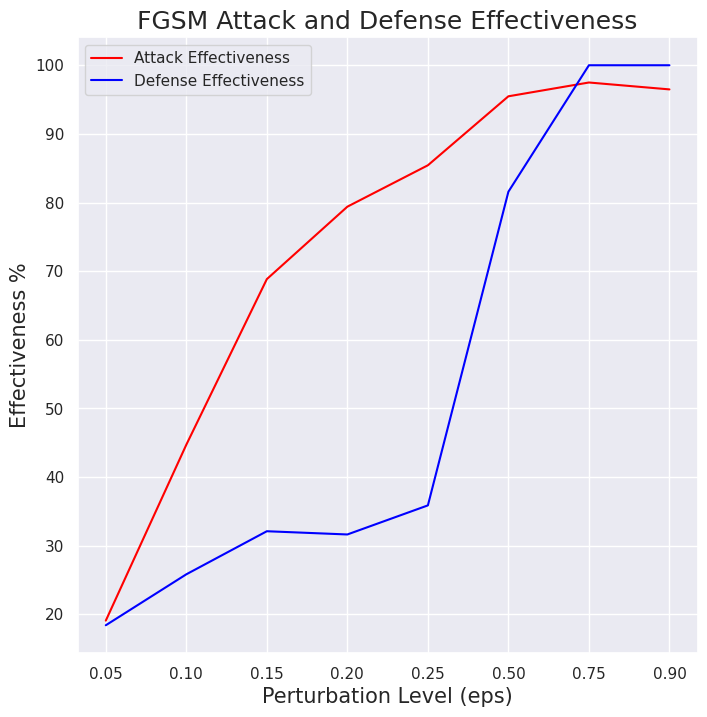

In [23]:
# Sample data
x = ["0.05", "0.10", "0.15", "0.20", "0.25", "0.50", "0.75", "0.90"]
y1 = [fgsm05_att_eff, fgsm10_att_eff, fgsm15_att_eff, fgsm20_att_eff, fgsm25_att_eff, fgsm50_att_eff, fgsm75_att_eff, fgsm90_att_eff]
y2 = [fgsm05_def_eff, fgsm10_def_eff, fgsm15_def_eff, fgsm20_def_eff, fgsm25_def_eff, fgsm50_def_eff, fgsm75_def_eff, fgsm90_def_eff]

df = pd.DataFrame({'X': x, 'Line 1': y1, 'Line 2': y2})
plt.figure(figsize=(8,8))
# Use Seaborn to plot the lines
sns.set(style="darkgrid")
sns.lineplot(x='X', y='Line 1', data=df, c="red", label='Attack Effectiveness')
sns.lineplot(x='X', y='Line 2', data=df, c="blue", label='Defense Effectiveness')

# Show the plot
plt.title("FGSM Attack and Defense Effectiveness", fontsize=18)
plt.xlabel("Perturbation Level (eps)", fontsize=15)
plt.ylabel("Effectiveness %", fontsize=15)
plt.legend()
plt.show()

/home/grads/hassledw/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/grads/hassledw/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/grads/hassledw/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/grads/hassledw/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. 

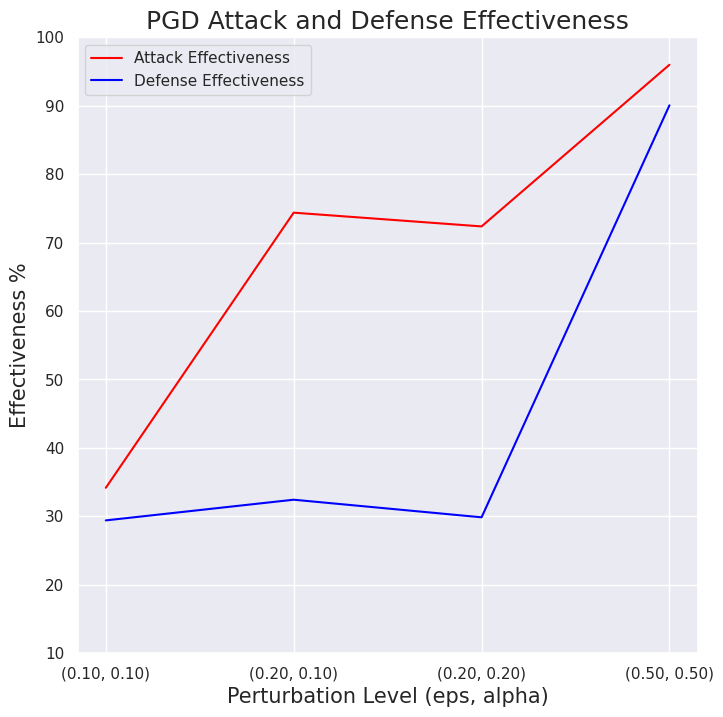

In [24]:
# Sample data
x = ["(0.10, 0.10)", "(0.20, 0.10)", "(0.20, 0.20)", "(0.50, 0.50)"]
y1 = [pgd1010_att_eff, pgd2010_att_eff, pgd2020_att_eff, pgd5050_att_eff]
y2 = [pgd1010_def_eff, pgd2010_def_eff, pgd2020_def_eff, pgd5050_def_eff]

df = pd.DataFrame({'X': x, 'Line 1': y1, 'Line 2': y2})
plt.figure(figsize=(8,8))
# Use Seaborn to plot the lines
sns.set(style="darkgrid")
sns.lineplot(x='X', y='Line 1', data=df, c="red", label='Attack Effectiveness')
sns.lineplot(x='X', y='Line 2', data=df, c="blue", label='Defense Effectiveness')

# Show the plot
plt.title("PGD Attack and Defense Effectiveness", fontsize=18)
plt.xlabel("Perturbation Level (eps, alpha)", fontsize=15)
plt.ylabel("Effectiveness %", fontsize=15)
plt.ylim(10, 100)
plt.legend()
plt.show()

### Different Prompts on Same Alpha Beta Values

Accuracy of classifier on original test set 81.41%
--------------------------------------------------
RUNNING FGSM10_P1 DEFENSE METRICS...

Attack Effectiveness: 44.72% (89/199)

DEFENSE EFFECTIVENESS
	StyleCLIP Dataset Retention: 64.47%

	Face Detection Effectiveness: 2.25% (2/89)
	Adversarial Classification Change Effectiveness: 23.60% (21/89)
		Sanitization Effectiveness: 6.74% (6/89)

	Examples in Both Defenses: 0.00% (0/89)

Overall Effectiveness (single-count): 25.84% (23/89)
Accuracy of classifier on original test set 81.41%
--------------------------------------------------
RUNNING FGSM10_P2 DEFENSE METRICS...

Attack Effectiveness: 44.72% (89/199)

DEFENSE EFFECTIVENESS
	StyleCLIP Dataset Retention: 64.47%

	Face Detection Effectiveness: 2.25% (2/89)
	Adversarial Classification Change Effectiveness: 24.72% (22/89)
		Sanitization Effectiveness: 5.62% (5/89)

	Examples in Both Defenses: 0.00% (0/89)

Overall Effectiveness (single-count): 26.97% (24/89)
Accuracy of classifier on 

/home/grads/hassledw/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/grads/hassledw/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/grads/hassledw/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


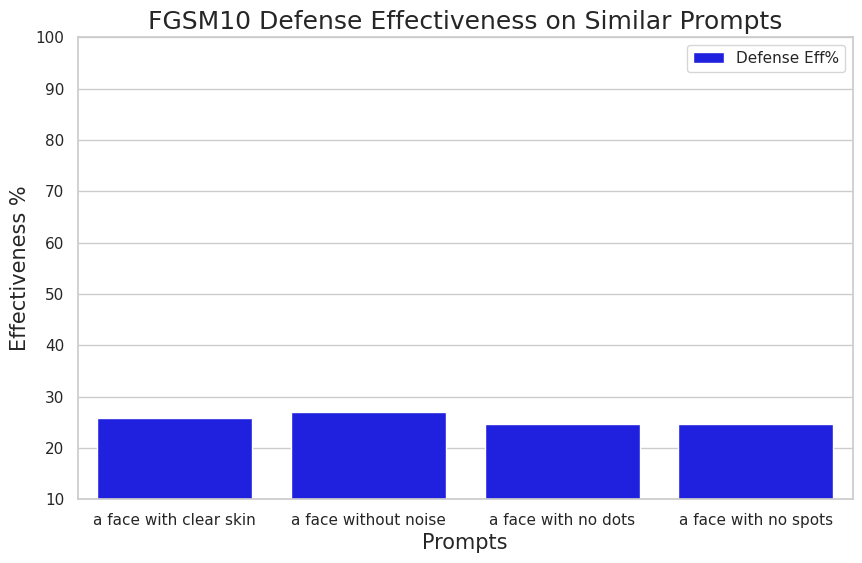

In [25]:
# Sample data

fgsm10_attack_df = pd.read_csv("/home/grads/hassledw/StyleCLIP_Defense/CelebA_HQ-Labeled/FGSM10.csv")
fgsm10_detected_df = pd.read_csv("/home/grads/hassledw/StyleCLIP_Defense/CelebA_HQ-Labeled/StyleCLIP-FGSM10-detected.csv")

fgsm10_defend_df_p1 = pd.read_csv("/home/grads/hassledw/StyleCLIP_Defense/CelebA_HQ-Labeled/StyleCLIP-FGSM10-p1.csv")
fgsm10_defend_df_p2 = pd.read_csv("/home/grads/hassledw/StyleCLIP_Defense/CelebA_HQ-Labeled/StyleCLIP-FGSM10-p2.csv")
fgsm10_defend_df_p3 = pd.read_csv("/home/grads/hassledw/StyleCLIP_Defense/CelebA_HQ-Labeled/StyleCLIP-FGSM10-p3.csv")
fgsm10_defend_df_p4 = pd.read_csv("/home/grads/hassledw/StyleCLIP_Defense/CelebA_HQ-Labeled/StyleCLIP-FGSM10-p4.csv")

p1_def, p1_att, _ = print_defense_metrics("FGSM10_P1", fgsm10_attack_df, fgsm10_defend_df_p1, fgsm10_detected_df)
p2_def, p2_att, _ = print_defense_metrics("FGSM10_P2", fgsm10_attack_df, fgsm10_defend_df_p2, fgsm10_detected_df)
p3_def, p3_att, _ = print_defense_metrics("FGSM10_P3", fgsm10_attack_df, fgsm10_defend_df_p3, fgsm10_detected_df)
p4_def, p4_att, _ = print_defense_metrics("FGSM10_P4", fgsm10_attack_df, fgsm10_defend_df_p4, fgsm10_detected_df)

data = {
    'Category': ['a face with clear skin', 'a face without noise', 'a face with no dots', 'a face with no spots'],
    'Defense Eff%': [p1_def, p2_def, p3_def, p4_def],
}

df = pd.DataFrame(data)

# Set the seaborn style
sns.set(style="whitegrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Defense Eff%', data=df, color='blue', label='Defense Eff%')
plt.legend()
plt.ylim(0, 100)

# Set plot labels and title
plt.xlabel('Prompts', fontsize=15)
plt.ylabel('Effectiveness %', fontsize=15)
plt.ylim(10, 100)
plt.title('FGSM10 Defense Effectiveness on Similar Prompts', fontsize=18)

# Show the plot
plt.show()

### Same Prompt on Different Alpha Beta Values

Accuracy of classifier on original test set 81.41%
--------------------------------------------------
RUNNING FGSM10_AB1 DEFENSE METRICS...

Attack Effectiveness: 44.72% (89/199)

DEFENSE EFFECTIVENESS
	StyleCLIP Dataset Retention: 67.51%

	Face Detection Effectiveness: 2.25% (2/89)
	Adversarial Classification Change Effectiveness: 28.09% (25/89)
		Sanitization Effectiveness: 5.62% (5/89)

	Examples in Both Defenses: 0.00% (0/89)

Overall Effectiveness (single-count): 30.34% (27/89)
Accuracy of classifier on original test set 81.41%
--------------------------------------------------
RUNNING FGSM10_AB2 DEFENSE METRICS...

Attack Effectiveness: 44.72% (89/199)

DEFENSE EFFECTIVENESS
	StyleCLIP Dataset Retention: 68.02%

	Face Detection Effectiveness: 2.25% (2/89)
	Adversarial Classification Change Effectiveness: 30.34% (27/89)
		Sanitization Effectiveness: 5.62% (5/89)

	Examples in Both Defenses: 0.00% (0/89)

Overall Effectiveness (single-count): 32.58% (29/89)
Accuracy of classifier o

/home/grads/hassledw/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/grads/hassledw/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/grads/hassledw/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


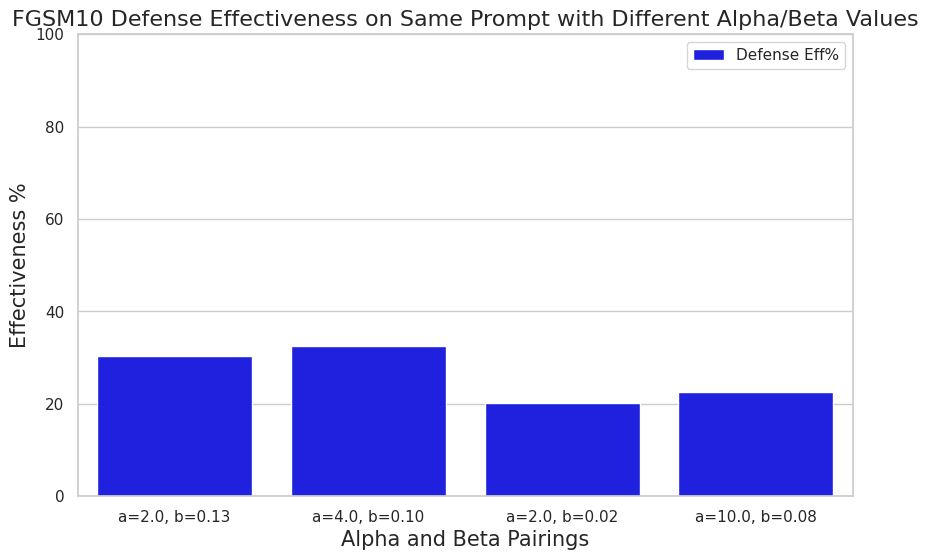

In [26]:
fgsm10_attack_df = pd.read_csv("/home/grads/hassledw/StyleCLIP_Defense/CelebA_HQ-Labeled/FGSM10.csv")
fgsm10_detected_df = pd.read_csv("/home/grads/hassledw/StyleCLIP_Defense/CelebA_HQ-Labeled/StyleCLIP-FGSM10-detected.csv")

fgsm10_defend_df_ab1 = pd.read_csv("/home/grads/hassledw/StyleCLIP_Defense/CelebA_HQ-Labeled/StyleCLIP-FGSM10-ab1.csv")
test_defended_df_ab1 = pd.read_csv("/home/grads/hassledw/StyleCLIP_Defense/CelebA_HQ-Labeled/StyleCLIP-test-ab1.csv")
fgsm10_defend_df_ab2 = pd.read_csv("/home/grads/hassledw/StyleCLIP_Defense/CelebA_HQ-Labeled/StyleCLIP-FGSM10-ab2.csv")
test_defended_df_ab2 = pd.read_csv("/home/grads/hassledw/StyleCLIP_Defense/CelebA_HQ-Labeled/StyleCLIP-test-ab2.csv")
fgsm10_defend_df_ab3 = pd.read_csv("/home/grads/hassledw/StyleCLIP_Defense/CelebA_HQ-Labeled/StyleCLIP-FGSM10-ab3.csv")
test_defended_df_ab3 = pd.read_csv("/home/grads/hassledw/StyleCLIP_Defense/CelebA_HQ-Labeled/StyleCLIP-test-ab3.csv")
fgsm10_defend_df_ab4 = pd.read_csv("/home/grads/hassledw/StyleCLIP_Defense/CelebA_HQ-Labeled/StyleCLIP-FGSM10-ab4.csv")
test_defended_df_ab4 = pd.read_csv("/home/grads/hassledw/StyleCLIP_Defense/CelebA_HQ-Labeled/StyleCLIP-test-ab4.csv")
# fgsm10_defend_df_ab5 = pd.read_csv("/home/grads/hassledw/StyleCLIP_Defense/CelebA_HQ-Labeled/StyleCLIP-FGSM10-ab5.csv")
# test_defended_df_ab5 = pd.read_csv("/home/grads/hassledw/StyleCLIP_Defense/CelebA_HQ-Labeled/StyleCLIP-test-ab5.csv")

ab1_def, ab1_att, ab1 = print_defense_metrics("FGSM10_AB1", fgsm10_attack_df, fgsm10_defend_df_ab1, fgsm10_detected_df, test_defended_df=test_defended_df_ab1)
ab2_def, ab2_att, ab2 = print_defense_metrics("FGSM10_AB2", fgsm10_attack_df, fgsm10_defend_df_ab2, fgsm10_detected_df, test_defended_df=test_defended_df_ab2)
ab3_def, ab3_att, ab3 = print_defense_metrics("FGSM10_AB3", fgsm10_attack_df, fgsm10_defend_df_ab3, fgsm10_detected_df, test_defended_df=test_defended_df_ab3)
ab4_def, ab4_att, ab4 = print_defense_metrics("FGSM10_AB4", fgsm10_attack_df, fgsm10_defend_df_ab4, fgsm10_detected_df, test_defended_df=test_defended_df_ab4)
# ab5_def, ab5_att, ab5 = print_defense_metrics("FGSM10_AB5", fgsm10_attack_df, fgsm10_defend_df_ab5, fgsm10_detected_df, test_defended_df=test_defended_df_ab5)

# Sample data
data = {
    'Category': ['a=2.0, b=0.13', 'a=4.0, b=0.10', 'a=2.0, b=0.02', 'a=10.0, b=0.08'],
    'Defense Eff%': [ab1_def, ab2_def, ab3_def, ab4_def]
}

df = pd.DataFrame(data)

# Set the seaborn style
sns.set(style="whitegrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Defense Eff%', data=df, color='blue', label='Defense Eff%')
plt.legend()
plt.ylim(0, 100)

# Set plot labels and title
plt.xlabel('Alpha and Beta Pairings', fontsize=15)
plt.ylabel('Effectiveness %', fontsize=15)
plt.title('FGSM10 Defense Effectiveness on Same Prompt with Different Alpha/Beta Values', fontsize=16)
# Show the plot
plt.show()

### Dataset Retention on AB pairing data

Accuracy of classifier on original test set 81.41%
Accuracy on StyleCLIP-test 67.51%
Accuracy of classifier on original test set 81.41%
Accuracy on StyleCLIP-test 68.02%
Accuracy of classifier on original test set 81.41%
Accuracy on StyleCLIP-test 19.80%
Accuracy of classifier on original test set 81.41%
Accuracy on StyleCLIP-test 35.53%


/home/grads/hassledw/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/grads/hassledw/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/grads/hassledw/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


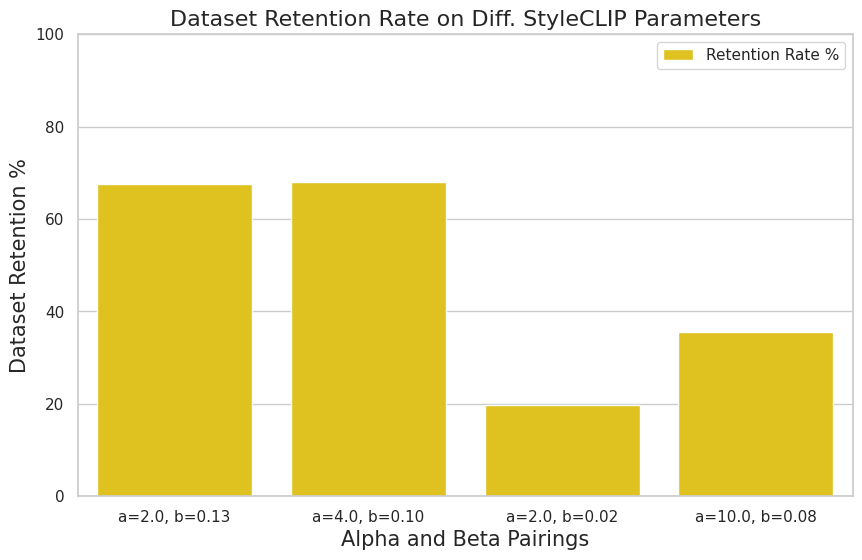

In [27]:
ab1_ret, _ = print_test_metrics(test_df, test_defended_df_ab1, test_detected_df)
ab2_ret, _ = print_test_metrics(test_df, test_defended_df_ab2, test_detected_df)
ab3_ret, _ = print_test_metrics(test_df, test_defended_df_ab3, test_detected_df)
ab4_ret, _ = print_test_metrics(test_df, test_defended_df_ab4, test_detected_df)
# _, _ = print_test_metrics(test_df, test_defended_df_ab5, test_detected_df)

data = {
    'Category': ['a=2.0, b=0.13', 'a=4.0, b=0.10', 'a=2.0, b=0.02', 'a=10.0, b=0.08'],
    'Retention Rate %': [ab1_ret, ab2_ret, ab3_ret, ab4_ret]
}

df = pd.DataFrame(data)

# Set the seaborn style
sns.set(style="whitegrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Retention Rate %', data=df, color='gold', label='Retention Rate %')
plt.legend()
plt.ylim(0, 100)

# Set plot labels and title
plt.xlabel('Alpha and Beta Pairings', fontsize=15)
plt.ylabel('Dataset Retention %', fontsize=15)
plt.title('Dataset Retention Rate on Diff. StyleCLIP Parameters', fontsize=16)
# Show the plot
plt.show()

### Adversarial Class Change Example

Accuracy of classifier on original test set 81.41%
--------------------------------------------------
RUNNING FGSM50 DEFENSE METRICS...

Attack Effectiveness: 95.48% (190/199)

DEFENSE EFFECTIVENESS
	StyleCLIP Dataset Retention: 64.47%

	Face Detection Effectiveness: 46.32% (88/190)
	Adversarial Classification Change Effectiveness: 41.58% (79/190)
		Sanitization Effectiveness: 0.53% (1/190)

	Examples in Both Defenses: 6.32% (12/190)

Overall Effectiveness (single-count): 81.58% (155/190)


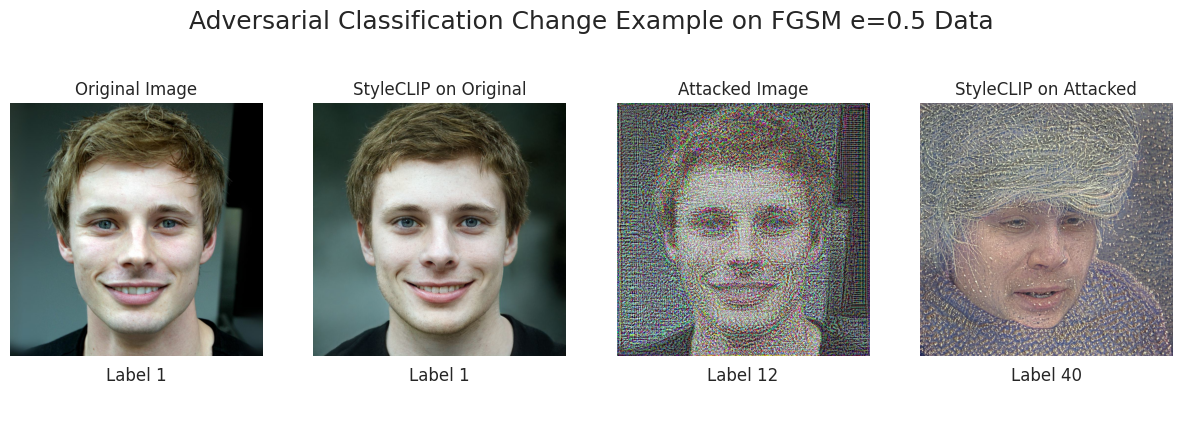

In [45]:
def display_adversarial_class_change(ind, test_df=test_df):

    _, _, data = print_defense_metrics("FGSM50", fgsm50_attack_df, fgsm50_defend_df, fgsm50_detected_df)
    succ_class_change = data["class_change"][1]
    entry = succ_class_change.loc[ind]
    test_label = entry["predicted_label_testdf"]
    attack_label = entry["predicted_label_attackdf"]
    defend_label = entry["predicted_label_defensedf"]

    test_defense_path = entry["image_path"]
    test_path = entry["image_path"].replace("StyleCLIP-test", "test")
    attack_path = entry["image_path"].replace("StyleCLIP-test", "FGSM50")
    defend_path = entry["image_path"].replace("StyleCLIP-test", "StyleCLIP-FGSM50")

    plt.figure(figsize=(15, 5))  # Adjust the (width, height) as needed
    plt.axis('off')
    plt.title("Adversarial Classification Change Example on FGSM e=0.5 Data", fontsize=18)
    path = "/home/grads/hassledw/StyleCLIP_Defense/"
    filenames = [f"{test_path}", f"{test_defense_path}", f"{attack_path}", f"{defend_path}"]
    titles = ["Original Image", "StyleCLIP on Original", "Attacked Image", "StyleCLIP on Attacked"]
    labels = [test_label, test_label, attack_label, defend_label]
    n_examples = len(filenames)
    for i, filename in enumerate(filenames):
        plt.subplot(1, n_examples, i + 1)
        plt.axis('off')
        plt.title(f"{titles[i]}")
        img = mpimg.imread(f'{filename}')
        imgplot = plt.imshow(img)
        plt.text(0.5, -0.10, f"Label {labels[i]}", ha='center', transform=plt.gca().transAxes)
    plt.show()


display_adversarial_class_change(0)

Accuracy of classifier on original test set 81.41%
--------------------------------------------------
RUNNING FGSM05 DEFENSE METRICS...

Attack Effectiveness: 19.10% (38/199)

DEFENSE EFFECTIVENESS
	StyleCLIP Dataset Retention: 64.47%

	Face Detection Effectiveness: 0.00% (0/38)
	Adversarial Classification Change Effectiveness: 18.42% (7/38)
		Sanitization Effectiveness: 10.53% (4/38)

	Examples in Both Defenses: 0.00% (0/38)

Overall Effectiveness (single-count): 18.42% (7/38)


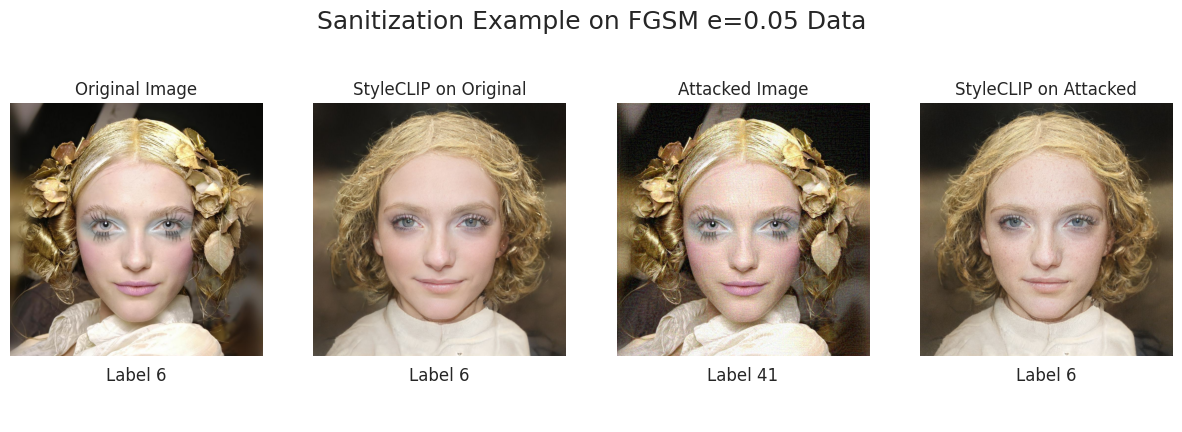

In [54]:
def display_sanitization(ind, test_df=test_df):

    _, _, data = print_defense_metrics("FGSM05", fgsm05_attack_df, fgsm05_defend_df, fgsm05_detected_df)
    succ_sanitization = data["sanitization"][1]
    entry = succ_sanitization.loc[ind]
    test_label = entry["predicted_label_testdf"]
    attack_label = entry["predicted_label_attackdf"]
    defend_label = entry["predicted_label_defensedf"]

    test_defense_path = entry["image_path"]
    test_path = entry["image_path"].replace("StyleCLIP-test", "test")
    attack_path = entry["image_path"].replace("StyleCLIP-test", "FGSM05")
    defend_path = entry["image_path"].replace("StyleCLIP-test", "StyleCLIP-FGSM05")

    plt.figure(figsize=(15, 5))  # Adjust the (width, height) as needed
    plt.axis('off')
    plt.title("Sanitization Example on FGSM e=0.05 Data", fontsize=18)
    path = "/home/grads/hassledw/StyleCLIP_Defense/"
    filenames = [f"{test_path}", f"{test_defense_path}", f"{attack_path}", f"{defend_path}"]
    titles = ["Original Image", "StyleCLIP on Original", "Attacked Image", "StyleCLIP on Attacked"]
    labels = [test_label, test_label, attack_label, defend_label]
    n_examples = len(filenames)
    for i, filename in enumerate(filenames):
        plt.subplot(1, n_examples, i + 1)
        plt.axis('off')
        plt.title(f"{titles[i]}")
        img = mpimg.imread(f'{filename}')
        imgplot = plt.imshow(img)
        plt.text(0.5, -0.10, f"Label {labels[i]}", ha='center', transform=plt.gca().transAxes)
    plt.show()

display_sanitization(0)

Accuracy of classifier on original test set 81.41%
--------------------------------------------------
RUNNING FGSM75 DEFENSE METRICS...

Attack Effectiveness: 97.49% (194/199)

DEFENSE EFFECTIVENESS
	StyleCLIP Dataset Retention: 64.47%

	Face Detection Effectiveness: 100.00% (194/194)
	Adversarial Classification Change Effectiveness: 4.12% (8/194)
		Sanitization Effectiveness: 0.00% (0/194)

	Examples in Both Defenses: 4.12% (8/194)

Overall Effectiveness (single-count): 100.00% (194/194)
image                                                                8784.jpg
predicted_label_testdf                                                     21
predicted_label_attackdf                                                   12
Unnamed: 0                                                                  0
image_path                  /home/grads/hassledw/StyleCLIP_Defense/CelebA_...
Name: 80, dtype: object
/home/grads/hassledw/StyleCLIP_Defense/CelebA_HQ_facial_identity_dataset/StyleCLIP-FGSM75/17

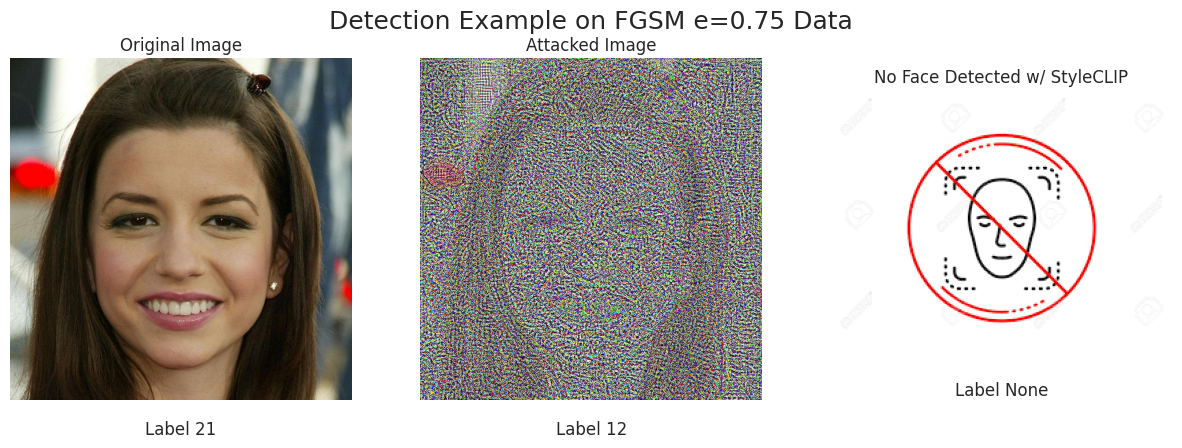

In [77]:
def display_detection(ind, test_df=test_df):

    _, _, data = print_defense_metrics("FGSM50", fgsm50_attack_df, fgsm50_defend_df, fgsm50_detected_df)
    succ_det = data["face_det"][1]
    entry = succ_det.loc[ind]
    print(entry)
    test_label = entry["predicted_label_testdf"]
    attack_label = entry["predicted_label_attackdf"]

    print(entry["image_path"])
    test_path = entry["image_path"].replace("StyleCLIP-FGSM50", "test")
    attack_path = entry["image_path"].replace("StyleCLIP-FGM50", "FGSM50")
    no_face_img = "/home/grads/hassledw/StyleCLIP_Defense/figures/no_face_detected.png"

    plt.figure(figsize=(15, 5))  # Adjust the (width, height) as needed
    plt.axis('off')
    plt.title("Detection Example on FGSM e=0.50 Data", fontsize=18)

    path = "/home/grads/hassledw/StyleCLIP_Defense/"
    filenames = [f"{test_path}", f"{attack_path}", f"/home/grads/hassledw/StyleCLIP_Defense/figures/no_face_detected.png"]
    titles = ["Original Image", "Attacked Image", "No Face Detected w/ StyleCLIP"]
    labels = [test_label, attack_label, "None"]
    n_examples = len(filenames)
    for i, filename in enumerate(filenames):
        plt.subplot(1, n_examples, i + 1)
        plt.axis('off')
        plt.title(f"{titles[i]}")
        img = mpimg.imread(f'{filename}')
        imgplot = plt.imshow(img)
        plt.text(0.5, -0.10, f"Label {labels[i]}", ha='center', transform=plt.gca().transAxes)
    plt.show()

display_detection(80)